In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score 

from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import os

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 300)

# Importing required statsmodels library
import statsmodels.api as sm

# From statsmodels importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor



# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read data from cvs file 
df=pd.read_csv("train.csv")

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df.shape


(1460, 81)

## NULL VALUES

In [8]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
df.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinSF1       False
BsmtFinType2      True
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
1stFlrSF   

## Data Cleaning

In [10]:
null_value_count = df[df.columns[df.isna().any()]].isna().sum().sort_values(ascending=False)
null_percentage = (df[df.columns[df.isna().any()]].isna().sum() * 100 / df.shape[0]).sort_values(ascending=False)

In [11]:
null_data = pd.concat([null_value_count, null_percentage], axis=1, keys=['Count', 'Percentage'])

In [12]:
null_data

,Count,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


In [13]:
#drop null above 15%


In [14]:
null_data[ null_data['Percentage'] > 15].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage'],
      dtype='object')

In [15]:
df.drop(columns=null_data[ null_data['Percentage'] > 15].index, inplace=True)

In [16]:
df.shape

(1460, 75)

In [17]:
null_data = null_data[null_data['Percentage'] < 15]
null_data

,Count,Percentage
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945
GarageCond,81,5.547945
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
BsmtFinType1,37,2.534247
BsmtCond,37,2.534247
BsmtQual,37,2.534247


In [18]:
#Null values greater then 15 %

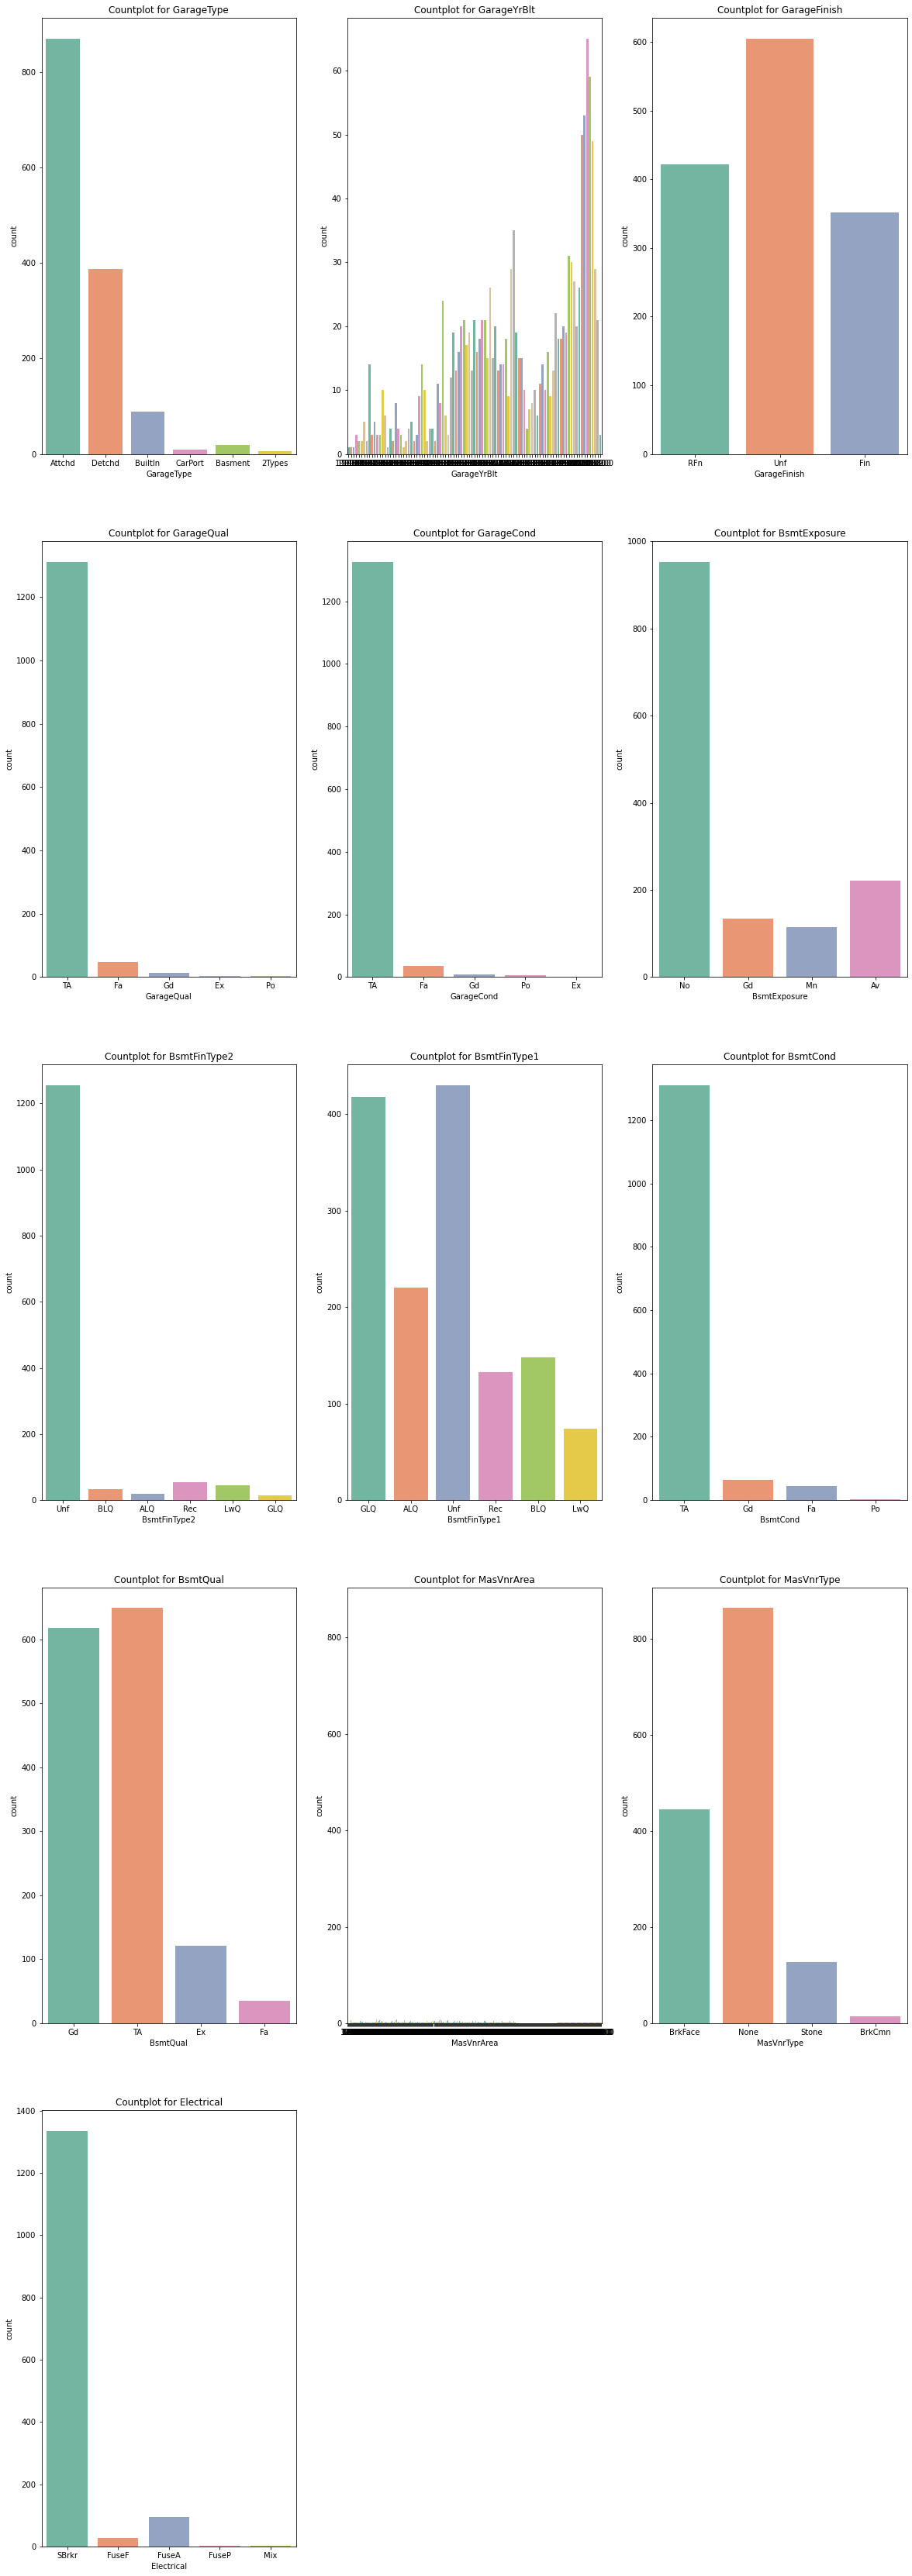

In [19]:
plt.figure(figsize=[20, 60])

for i, var in enumerate(null_data.index,start=1):
    plt.subplot(5,3,i)
    sns.countplot(df[var], palette='Set2')
    plt.title(f"Countplot for {var}")

### if categorical , mode() to replace with missing value
### if numerical, median to replace with missing value

In [20]:
# garagetype NA will replace with none


In [21]:
df['GarageType'].fillna('None', inplace=True)

In [22]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)

In [23]:
df['GarageFinish'].fillna('None', inplace=True)

In [24]:
df['GarageQual'].fillna('None', inplace=True)

In [25]:
df['GarageCond'].fillna('None', inplace=True)

In [26]:
df['BsmtExposure'].fillna('None', inplace=True)

In [27]:
df['BsmtFinType2'].fillna('None', inplace=True)

df['BsmtFinType1'].fillna('None', inplace=True)

df['BsmtCond'].fillna('None', inplace=True)

df['BsmtQual'].fillna('None', inplace=True)

df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)

df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace=True)

In [28]:
val = df['Electrical'].mode()[0]

df['Electrical'].fillna(val, inplace=True)

Check for null again

In [29]:
null_value_count = df[df.columns[df.isna().any()]].isna().sum().sort_values(ascending=False)
null_percentage = (df[df.columns[df.isna().any()]].isna().sum() * 100 / df.shape[0]).sort_values(ascending=False)
null_data = pd.concat([null_value_count, null_percentage], axis=1, keys=['Count', 'Percentage'])
null_data

,Count,Percentage


## drop columns which is not important

In [30]:
# if variance is low, scope of model is low , drop this
# remove unwanted column

In [31]:
# drop street column
df.drop(columns='Street', inplace=True)

In [32]:
# drop condition2 column, too much variance
df.drop(columns='Condition2', inplace=True)

In [33]:
#drop RoofMatl , too much variance
df.drop(columns='RoofMatl', inplace=True)

In [34]:
# drop Heating, too much variance
df.drop(columns='Heating', inplace=True)


In [35]:
# drop LowQualFinSF, too much variance
df.drop(columns='LowQualFinSF', inplace=True)

In [36]:
# drop 3SsnPorch, too much variance
df.drop(columns='3SsnPorch', inplace=True)

In [37]:
# drop ScreenPorch, too much variance
df.drop(columns='ScreenPorch', inplace=True)

In [38]:
# drop columns, too much variance
df.drop(columns='PoolArea', inplace=True)
df.drop(columns='MiscVal', inplace=True)
df.drop(columns='Utilities', inplace=True)

#drop id not in used
df.drop(columns='Id', inplace=True)

In [39]:
df.shape

(1460, 64)

In [40]:
df.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,2,2008,WD,Normal,208500
1,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,9,2008,WD,Normal,223500
3,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,SBrkr,961,756,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,2,2006,WD,Abnorml,140000
4,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,12,2008,WD,Normal,250000


In [41]:
CurrentYear = 2021

In [42]:
df['Age_Built_Years'] = CurrentYear - df['YearBuilt']
df['Age_RemodAdd_Years'] = CurrentYear - df['YearRemodAdd']
df['Age_GarageYrBlt_Years'] = CurrentYear - df['GarageYrBlt']
df['Age_YrSold_Years'] = CurrentYear - df['YrSold']

In [43]:
# dorp the column
df.drop(columns=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], inplace=True)


In [44]:
df.shape

(1460, 64)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MSSubClass             1460 non-null   int64  
 1   MSZoning               1460 non-null   object 
 2   LotArea                1460 non-null   int64  
 3   LotShape               1460 non-null   object 
 4   LandContour            1460 non-null   object 
 5   LotConfig              1460 non-null   object 
 6   LandSlope              1460 non-null   object 
 7   Neighborhood           1460 non-null   object 
 8   Condition1             1460 non-null   object 
 9   BldgType               1460 non-null   object 
 10  HouseStyle             1460 non-null   object 
 11  OverallQual            1460 non-null   int64  
 12  OverallCond            1460 non-null   int64  
 13  RoofStyle              1460 non-null   object 
 14  Exterior1st            1460 non-null   object 
 15  Exte

In [46]:
# categorical variable
cat_var = df.select_dtypes(include='object').columns
cat_var

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [47]:
# numerical variables
num_var = df.select_dtypes(exclude='object').columns
num_var

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'SalePrice', 'Age_Built_Years',
       'Age_RemodAdd_Years', 'Age_GarageYrBlt_Years', 'Age_YrSold_Years'],
      dtype='object')

Target value of salesprice

<Figure size 1440x1080 with 0 Axes>

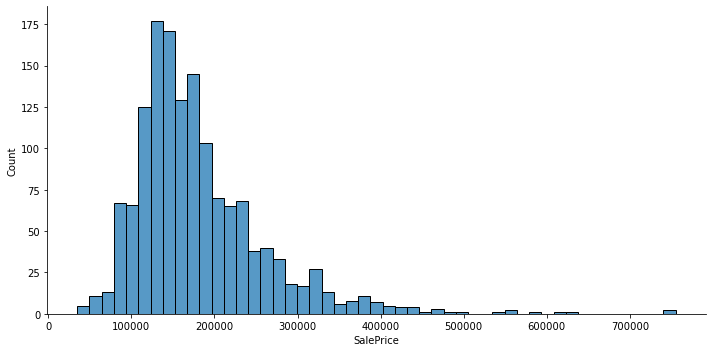

In [48]:
plt.figure(figsize=[20,15])
sns.displot(df['SalePrice'], aspect=2)
plt.show()

after looking the graph distribution is towards right

#### Checking skew value of salesprice

In [49]:
df['SalePrice'].skew()

1.8828757597682129

as skew is greater then 1 so sales price is highly skewed


####  Checking Kurtosis value of salesprice

In [50]:
df['SalePrice'].kurtosis()

6.536281860064529

vlaue is greater than 6.5 distribution tail is heavier

<Figure size 1440x1080 with 0 Axes>

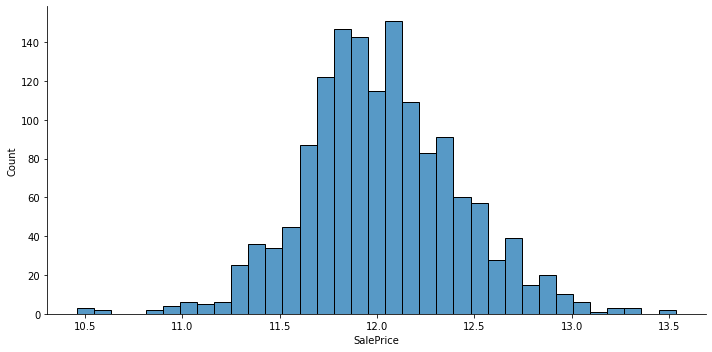

In [51]:
plt.figure(figsize=[20,15])
sns.displot(np.log(df['SalePrice']), aspect=2)
plt.show()

In [52]:
df['Transformed_SalePrice'] = np.log(df['SalePrice'])

<Figure size 1440x1080 with 0 Axes>

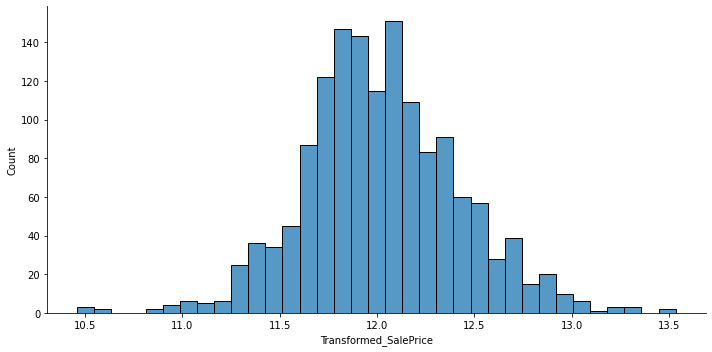

In [53]:
# Plotting distribution 
plt.figure(figsize=[20,15])
sns.displot(df['Transformed_SalePrice'], aspect=2)
plt.show()

In [54]:
df.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SaleType,SaleCondition,SalePrice,Age_Built_Years,Age_RemodAdd_Years,Age_GarageYrBlt_Years,Age_YrSold_Years,Transformed_SalePrice
0,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,2,WD,Normal,208500,18,18,18.0,13,12.247694
1,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,5,WD,Normal,181500,45,45,45.0,14,12.109011
2,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,9,WD,Normal,223500,20,19,20.0,13,12.317167
3,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,SBrkr,961,756,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,2,WD,Abnorml,140000,106,51,23.0,15,11.849398
4,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,12,WD,Normal,250000,21,21,21.0,13,12.429216


In [55]:
df.shape

(1460, 65)

# EDA

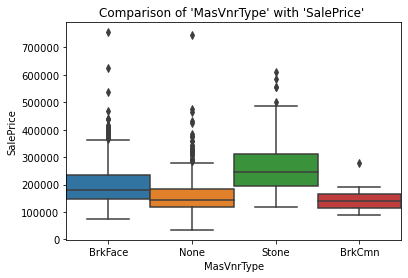

In [56]:
var = 'MasVnrType'
sns.boxplot(x=var, y='SalePrice', data=df, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()

#### Stone hag higer median slaes price than other

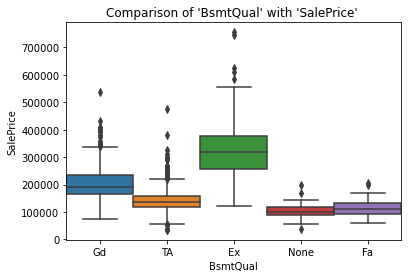

In [57]:
var = 'BsmtQual'
sns.boxplot(x=var, y='SalePrice', data=df, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()

#### As basement quality increase, increase in sales

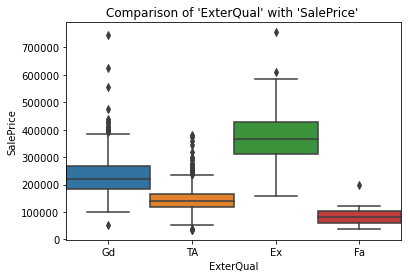

In [58]:
var = 'ExterQual'
sns.boxplot(x=var, y='SalePrice', data=df, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()

Extriror quality increase , increase in sales price

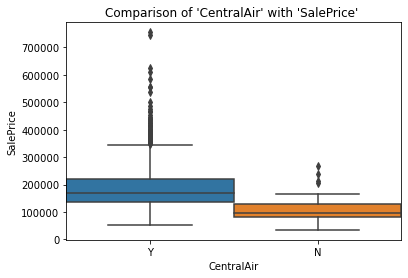

In [59]:
var = 'CentralAir'
sns.boxplot(x=var, y='SalePrice', data=df, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()

Central air condition has higer median price 

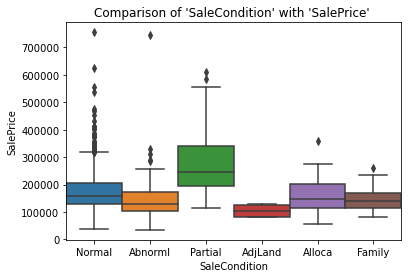

In [60]:
var = 'SaleCondition'
sns.boxplot(x=var, y='SalePrice', data=df, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()


House which is partially completed has higer median sales price then others


### Correlation matrix and heatmap

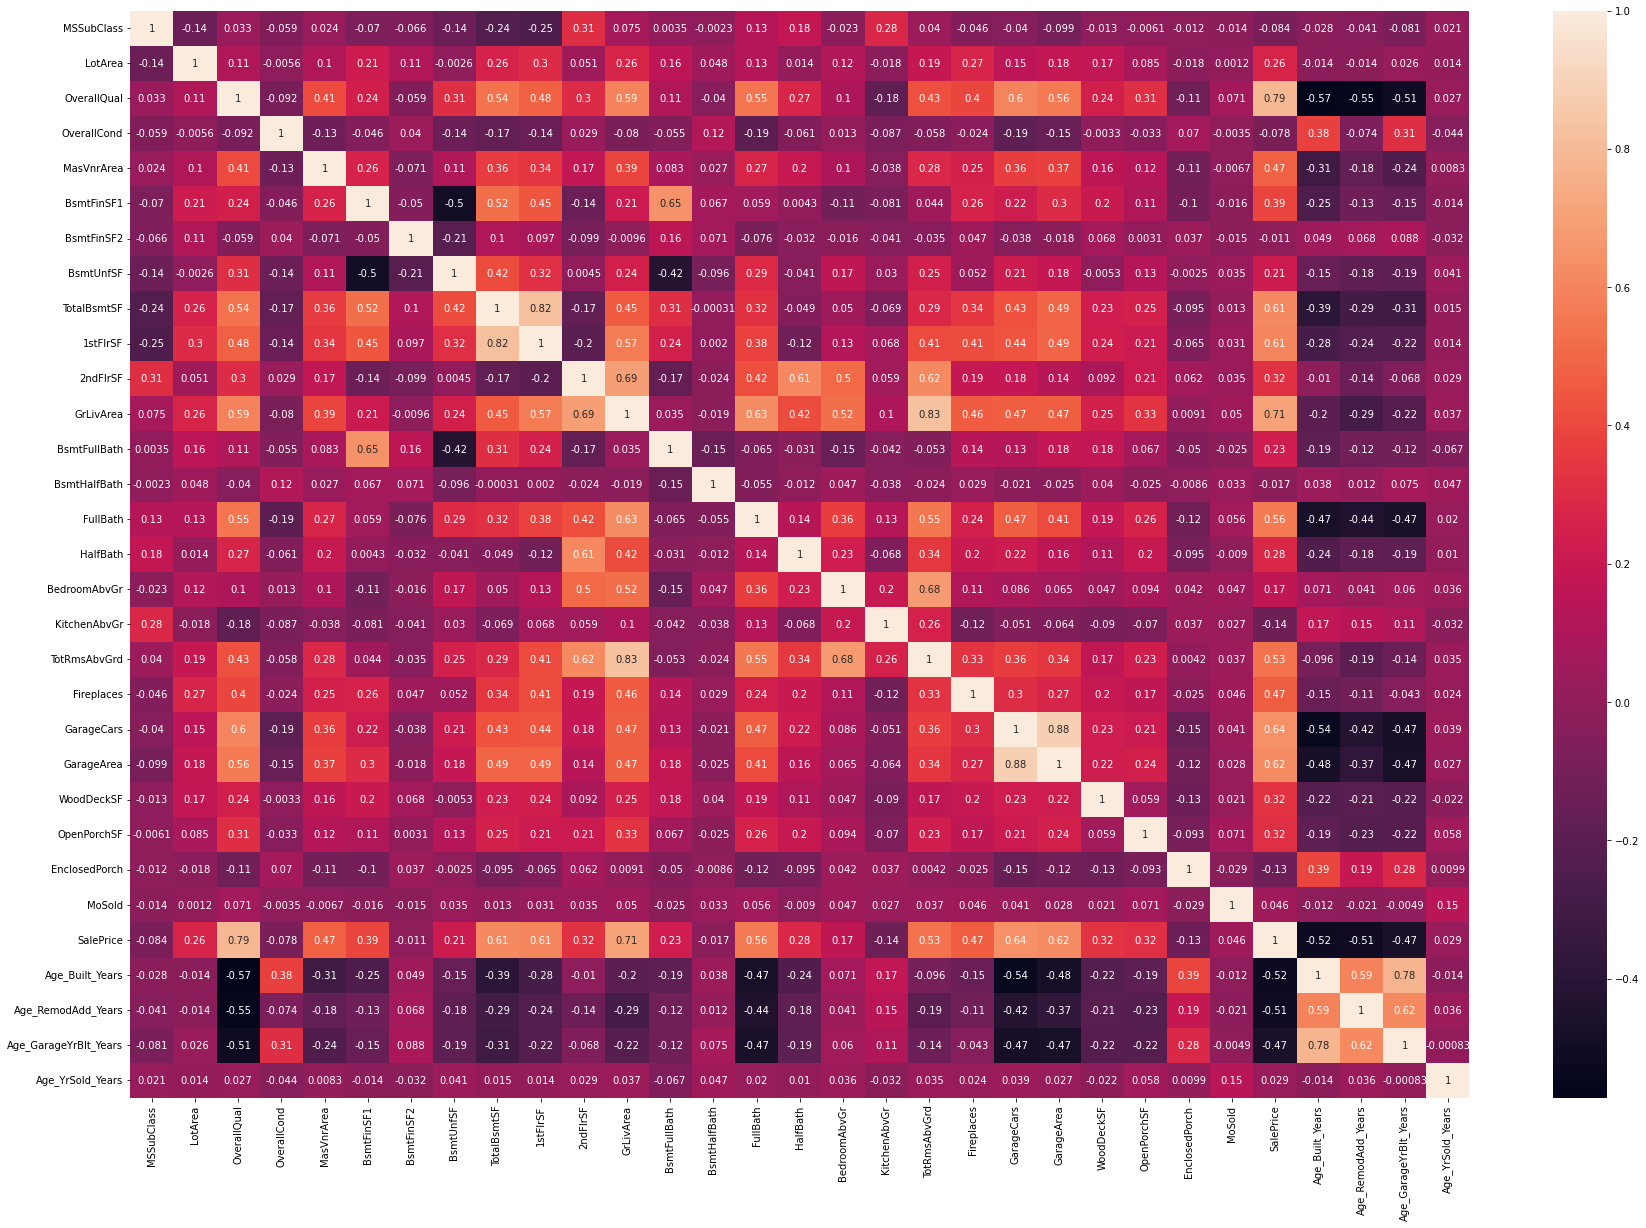

In [61]:
plt.figure(figsize=[30,20])
corr = df.drop(columns='Transformed_SalePrice', axis=1)
corr = corr.corr()
mask=np.triu(np.ones_like(corr)) # Masking upper half of the triangle
sns.heatmap(corr, annot=True)
plt.show()

we will pick top 10 sales price for corelated variables

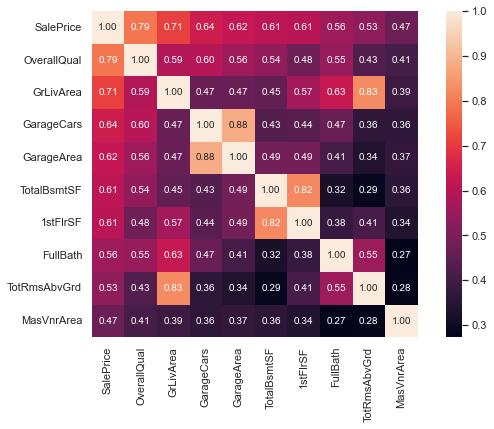

In [62]:
plt.figure(figsize=[10,6])

k = 10 # number of variables for a heatmap
cols = corr.nlargest(k,'SalePrice')['SalePrice'].index
corrmatrix = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(corrmatrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},
                yticklabels=cols.values, xticklabels=cols.values )
plt.show()

from above plot we can say that

- GrLivArea and TotaRmsAvbGrad are highly correlated at 0.83
- TotalBsmtSF and 1stFlrSF are highly correlated at 0.82
- GarageArea and GarageCars are highly correlated at 0.88
- OverallQual and SalePrice are highly correlated at o.79

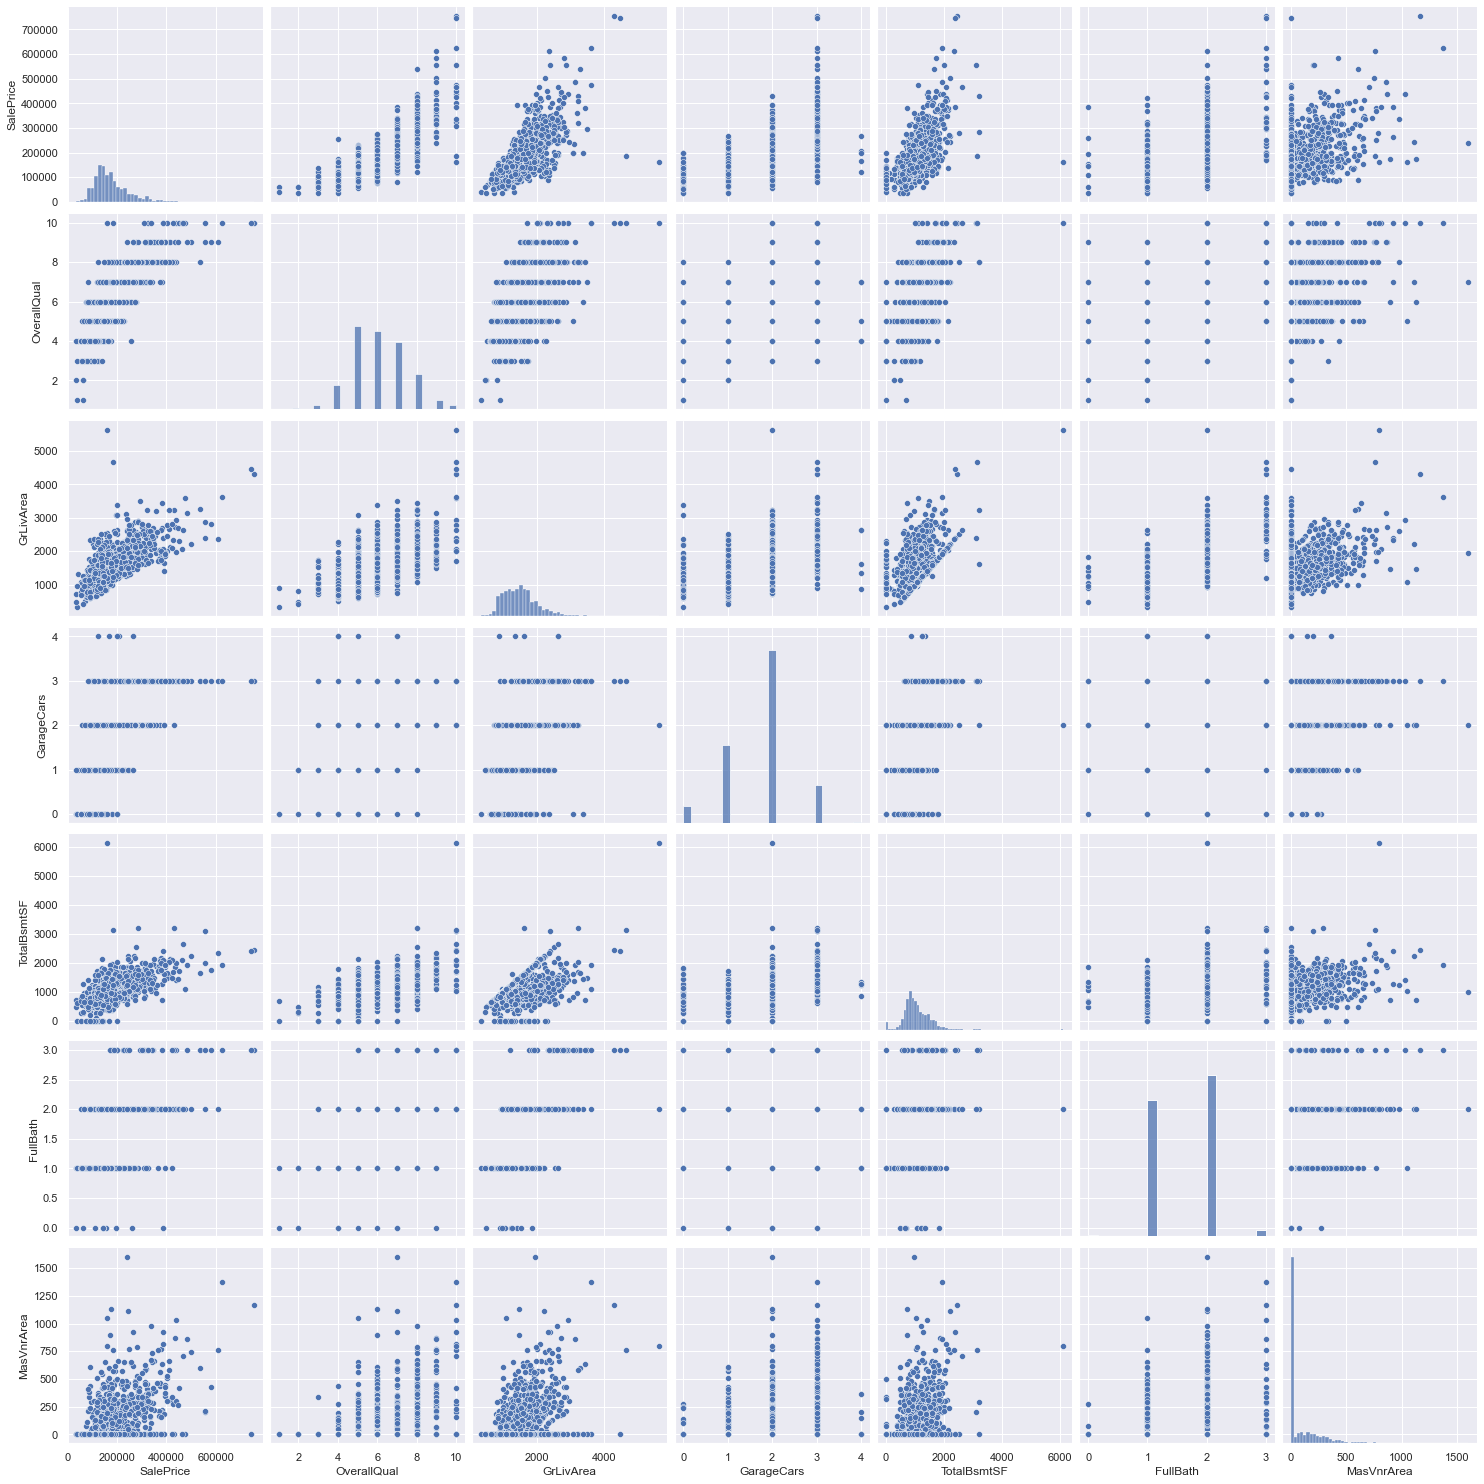

In [63]:
columns = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','MasVnrArea']
sns.pairplot(df[columns], size=3)
plt.show()

TotalBasementSF, GrLivingArea & OverallQual are linearly correlated with SalePrice

TotalBasementSF and GrLivingArea have a positive correlation

Distribution of MasVnrArea is skewed to the right

### Data Preparation

In [64]:
# categorical var
cat_var = df.select_dtypes(include='object').columns
print(len(cat_var))

33


In [65]:
#OHE 
df_categorical = df.select_dtypes(include='object')

In [66]:
df_categorical.columns.shape

(33,)

In [67]:
#ohe for categorical col
df_dummies = pd.get_dummies(df_categorical, drop_first=True)

In [68]:
df_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

In [69]:
# drop categorical column from df
df.drop(list(df_categorical.columns), axis=1, inplace=True)

In [70]:
df.shape

(1460, 32)

In [71]:
#merge df and df_dummies 
df = pd.concat([df, df_dummies], axis=1)

In [72]:
df.shape

(1460, 216)

In [73]:
df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SalePrice,Age_Built_Years,Age_RemodAdd_Years,Age_GarageYrBlt_Years,Age_YrSold_Years,Transformed_SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,196.0,706,0,150,856,856,854,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,2,208500,18,18,18.0,13,12.247694,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,0.0,978,0,284

In [74]:
#divide data in x and y building model
X = df.drop(['SalePrice','Transformed_SalePrice'], axis=1)
y = df['Transformed_SalePrice']

In [75]:
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,Age_Built_Years,Age_RemodAdd_Years,Age_GarageYrBlt_Years,Age_YrSold_Years,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,196.0,706,0,150,856,856,854,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,2,18,18,18.0,13,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,0.0,978,0,284,1262,1262,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,5

In [76]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: Transformed_SalePrice, dtype: float64

### Split train and test set

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
print(X_train.shape)
print(y_train.shape)

(1022, 214)
(1022,)


In [79]:
print(X_test.shape)
print(y_test.shape)

(438, 214)
(438,)


In [80]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 216 columns):
 #    Column                 Non-Null Count  Dtype  
---   ------                 --------------  -----  
 0    MSSubClass             1460 non-null   int64  
 1    LotArea                1460 non-null   int64  
 2    OverallQual            1460 non-null   int64  
 3    OverallCond            1460 non-null   int64  
 4    MasVnrArea             1460 non-null   float64
 5    BsmtFinSF1             1460 non-null   int64  
 6    BsmtFinSF2             1460 non-null   int64  
 7    BsmtUnfSF              1460 non-null   int64  
 8    TotalBsmtSF            1460 non-null   int64  
 9    1stFlrSF               1460 non-null   int64  
 10   2ndFlrSF               1460 non-null   int64  
 11   GrLivArea              1460 non-null   int64  
 12   BsmtFullBath           1460 non-null   int64  
 13   BsmtHalfBath           1460 non-null   int64  
 14   FullBath               1460 non-null  

In [81]:
# min max scaling - numerical var
num_var = X_train.select_dtypes(include=['int64', 'float64']).columns
print(len(num_var))
num_var

30


Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'Age_Built_Years', 'Age_RemodAdd_Years',
       'Age_GarageYrBlt_Years', 'Age_YrSold_Years'],
      dtype='object')

In [82]:
sc = MinMaxScaler()

# fit and transform on the train 
X_train[num_var] = sc.fit_transform(X_train[num_var])

# Perform only transform on the test dataset
X_test[num_var] = sc.transform(X_test[num_var])

In [83]:
print(X_train.shape)
print(X_test.shape)

(1022, 214)
(438, 214)


### LR using Modeling

In [84]:
# base model

In [85]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [86]:
# Checking co-efficients  
coeff = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficients'])
coeff

,Coefficients
MSSubClass,-3.851381e-02
LotArea,2.338487e-01
OverallQual,4.509484e-01
OverallCond,2.380484e-01
MasVnrArea,-6.285207e-02
BsmtFinSF1,2.772679e+10
BsmtFinSF2,5.536515e+09
BsmtUnfSF,1.147586e+10
TotalBsmtSF,-3.001607e+10
1stFlrSF,-9.024115e-01


In [87]:
# Intercept
regressor.intercept_

10.637208787612431

In [88]:
# predictions on test data 
y_pred = regressor.predict(X_test)

In [89]:
# Showing actual and predicted 
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_result

,Actual,Predicted
892,11.947949,11.925950
1105,12.691580,12.752067
413,11.652687,11.534770
522,11.976659,12.122233
1036,12.661914,12.738813
...,...,...
331,11.842229,11.771574
323,11.745425,11.736641
650,12.235389,12.279463
439,11.608236,11.702643


In [90]:
X_train.shape

(1022, 214)

In [91]:
X_test.shape

(438, 214)

In [92]:
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric.append(mse_test_lr**0.5)

Train r2 score is : 0.9224310325208298
Test r2 score is : -3.4775080627959e+17
Train RSS score is : 12.288147824799841
Test RSS score is : 2.5839630708570255e+19
Train MSE score is : 0.012023628008610412
Test MSE score is : 5.89945906588362e+16


## Model 1 - build model using RFE

In [93]:
X_train.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=214)

214 features, 50 initally

In [94]:
# LinearRegression 
lm = LinearRegression()
lm.fit(X_train,y_train)

# RFE
rfe = RFE(lm,50)
# Running RFE
rfe = rfe.fit(X_train,y_train)

In [95]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 93),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 9),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 49),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 47),
 ('FullBath', True, 1),
 ('HalfBath', False, 23),
 ('BedroomAbvGr', False, 18),
 ('KitchenAbvGr', False, 19),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', False, 91),
 ('WoodDeckSF', False, 28),
 ('OpenPorchSF', False, 135),
 ('EnclosedPorch', True, 1),
 ('MoSold', False, 80),
 ('Age_Built_Years', True, 1),
 ('Age_RemodAdd_Years', True, 1),
 ('Age_GarageYrBlt_Years', False, 82),
 ('Age_YrSold_Years', False, 147),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 99),
 ('LotShape_IR3', True, 1

In [96]:
# Looking at the 50 variables selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'EnclosedPorch',
       'Age_Built_Years', 'Age_RemodAdd_Years', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl', 'LotConfig_FR3',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'BldgType_Twnhs',
       'HouseStyle_2.5Unf', 'RoofStyle_Gable', 'RoofStyle_Hip',
       'Exterior1st_BrkComm', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing',
       'Exterior2nd_Wd Sdng', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_None',
       'BsmtQual_TA', 'BsmtCond_None', 'BsmtExposure_None',
       'BsmtFinType1_None', 'HeatingQC_Po', 'Functional_Maj2',
       'Functional_Sev', 'SaleType_ConLD'],
      dtype='object'

In [97]:
X_train.columns[~rfe.support_]

Index(['MasVnrArea', 'BsmtFinSF2', '1stFlrSF', 'BsmtHalfBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=164)

### Model 2 build model using 50 feature

In [98]:
X_train_rfe = X_train[col]

In [99]:
X_train_rfe.shape

(1022, 50)

In [100]:
# Functions to build model using statsmodels and check VIF
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [101]:
X_train_new = build_model(X_train_rfe,y_train)

                              OLS Regression Results                             
Dep. Variable:     Transformed_SalePrice   R-squared:                       0.891
Model:                               OLS   Adj. R-squared:                  0.886
Method:                    Least Squares   F-statistic:                     169.5
Date:                   Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                           17:36:03   Log-Likelihood:                 635.43
No. Observations:                   1022   AIC:                            -1175.
Df Residuals:                        974   BIC:                            -938.2
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [102]:
HighVIF = checkVIF(X_train_new)

In [103]:
# getting feature VIF over 5

In [104]:
HighVIF[ HighVIF['VIF'] >=5 ]


,Features,VIF
42,BsmtQual_None,inf
46,BsmtFinType1_None,inf
45,BsmtExposure_None,inf
44,BsmtCond_None,inf
0,const,487.37
20,MSZoning_RL,48.63
21,MSZoning_RM,37.52
7,TotalBsmtSF,15.75
9,GrLivArea,13.56
18,MSZoning_FV,13.06


In [105]:
highVIF_columns = list(HighVIF[ HighVIF['VIF'] >=5 ].Features.values)

In [106]:
len(highVIF_columns)

18

In [107]:
highVIF_columns.remove('const')

In [108]:
len(highVIF_columns)

17

In [109]:
highVIF_columns

['BsmtQual_None',
 'BsmtFinType1_None',
 'BsmtExposure_None',
 'BsmtCond_None',
 'MSZoning_RL',
 'MSZoning_RM',
 'TotalBsmtSF',
 'GrLivArea',
 'MSZoning_FV',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'RoofStyle_Hip',
 'RoofStyle_Gable',
 'BsmtQual_TA',
 '2ndFlrSF',
 'Age_Built_Years',
 'BsmtQual_Gd']

### delete high VIF

In [110]:
X_train_rfe.shape

(1022, 50)

In [111]:
X_train_rfe.drop(highVIF_columns, axis=1, inplace=True)

In [112]:
X_train_rfe.shape

(1022, 33)

In [113]:
X_train_rfe.head()

,MSSubClass,LotArea,OverallQual,OverallCond,BsmtFullBath,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,EnclosedPorch,Age_RemodAdd_Years,MSZoning_RH,LotShape_IR3,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_FR3,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Neighborhood_Veenker,BldgType_Twnhs,HouseStyle_2.5Unf,Exterior1st_BrkComm,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Wd Sdng,BsmtQual_Fa,HeatingQC_Po,Functional_Maj2,Functional_Sev,SaleType_ConLD
135,0.000000,0.042534,0.666667,0.625,0.000000,0.666667,0.416667,0.333333,0.50,0.0,0.666667,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1452,0.941176,0.011101,0.444444,0.500,0.333333,0.333333,0.250000,0.000000,0.50,0.0,0.083333,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
762,0.235294,0.034308,0.666667,0.500,0.000000,0.666667,0.416667,0.000000,0.50,0.0,0.016667,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
932,0.000000,0.048470,0.888889,0.500,0.000000,0.666667,0.500000,0.333333,0.75,0.0,0.066667,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
435,0.235294,0.043782,0.666667,0.625,0.333333,0.666667,0.333333,0.333333,0.50,0.0,0.233333,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Final Model

In [114]:
X_train_lm = sm.add_constant(X_train_rfe)
 
lr = sm.OLS(y_train,X_train_lm)
 
lm = lr.fit()
 
lm.params

const                   10.850525
MSSubClass              -0.158513
LotArea                  0.584710
OverallQual              0.968906
OverallCond              0.130120
BsmtFullBath             0.279820
FullBath                 0.236949
TotRmsAbvGrd             0.401223
Fireplaces               0.211342
GarageCars               0.418052
EnclosedPorch           -0.049253
Age_RemodAdd_Years      -0.155109
MSZoning_RH             -0.032884
LotShape_IR3            -0.200509
LandContour_HLS          0.108532
LandContour_Low          0.148183
LandContour_Lvl          0.076949
LotConfig_FR3           -0.146772
Neighborhood_Crawfor     0.140443
Neighborhood_NoRidge     0.171927
Neighborhood_NridgHt     0.117474
Neighborhood_StoneBr     0.186035
Neighborhood_Veenker     0.138209
BldgType_Twnhs          -0.069699
HouseStyle_2.5Unf       -0.032759
Exterior1st_BrkComm     -0.325315
Exterior1st_Wd Sdng     -0.126112
Exterior1st_WdShing     -0.112146
Exterior2nd_Wd Sdng      0.097166
BsmtQual_Fa   

In [115]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Transformed_SalePrice   R-squared:                       0.859
Model:                               OLS   Adj. R-squared:                  0.854
Method:                    Least Squares   F-statistic:                     181.7
Date:                   Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                           17:36:04   Log-Likelihood:                 501.94
No. Observations:                   1022   AIC:                            -935.9
Df Residuals:                        988   BIC:                            -768.3
Df Model:                             33                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.8505      0.049    223.412      0.000      10.755      10.946
MSSubClass              -0.1585      0.022     -7.289      0.000      -0.201      -0.116
LotArea                  0.5847      0.109      5.368      0.000       0.371       0.798
OverallQual              0.9689      0.049     19.581      0.000       0.872       1.066
OverallCond              0.1301      0.038      3.442      0.001       0.056       0.204
BsmtFullBath             0.2798      0.029      9.596      0.000       0.223       0.337
FullBath                 0.2369      0.038      6.213      0.000       0.162       0.312
TotRmsAbvGrd             0.4012      0.046      8.815      0.000       0.312       0.491
Fireplaces               0.2113      0.026      8.113      0.000       0.160       0.262
GarageCars               0.4181      0.035     12.032      0.000       0.350       0.486
EnclosedPorch           -0.0493      0.045     -1.083      0.279      -0.138       0.040
Age_RemodAdd_Years      -0.1551      0.018     -8.451      0.000      -0.191      -0.119
MSZoning_RH             -0.0329      0.043     -0.763      0.446      -0.118       0.052
LotShape_IR3            -0.2005      0.057     -3.532      0.000      -0.312      -0.089
LandContour_HLS          0.1085      0.038      2.827      0.005       0.033       0.184
LandContour_Low          0.1482      0.042      3.533      0.000       0.066       0.230
LandContour_Lvl          0.0769      0.026      2.962      0.003       0.026       0.128
LotConfig_FR3           -0.1468      0.089     -1.649      0.099      -0.321       0.028
Neighborhood_Crawfor     0.1404      0.028      5.064      0.000       0.086       0.195
Neighborhood_NoRidge     0.1719      0.031      5.635      0.000       0.112       0.232
Neighborhood_NridgHt     0.1175      0.025      4.791      0.000       0.069       0.166
Neighborhood_StoneBr     0.1860      0.036      5.154      0.000       0.115       0.257
Neighborhood_Veenker     0.1382      0.054      2.539      0.011       0.031       0.245
BldgType_Twnhs          -0.0697      0.032     -2.175      0.030      -0.133      -0.007
HouseStyle_2.5Unf       -0.0328      0.053     -0.615      0.539      -0.137       0.072
Exterior1st_BrkComm     -0.3253      0.108     -3.015      0.003      -0.537      -0.114
Exterior1st_Wd Sdng     -0.1261      0.027     -4.594      0.000      -0.180      -0.072
Exterior1st_WdShing     -0.1121      0.037     -2.998      0.003      -0.186      -0.039
Exterior2nd_Wd Sdng      0.0972      0.028      3.476      0.001       0.042       0.152
BsmtQual_Fa             -0.0481      0.030     -1.592      0.112      -0.107       0.011
HeatingQC_Po            -0.2640      0.152     -1.734      0.083      -0.563       0.035
Functional_Maj2         

In [116]:
print(X_train_rfe.shape)
print(X_test.shape)

(1022, 33)
(438, 214)


In [117]:
names = X_train_rfe.columns

In [118]:
X_test_new = X_test[names]

In [119]:
X_test_new.shape

(438, 33)

In [120]:
X_test_new = sm.add_constant(X_test_new)

In [121]:
X_test_new.shape

(438, 34)

## Linear Regression Final Model Evaluation

In [122]:
y_pred_train = lm.predict(X_train_lm)
y_pred_test = lm.predict(X_test_new)

metric_lr = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_lr.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_lr.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_lr.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_lr.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_lr.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_lr.append(mse_test_lr**0.5)

Train r2 score is : 0.8585553009127601
Test r2 score is : 0.8345758562055663
Train RSS score is : 22.407071125254678
Test RSS score is : 12.291844357343955
Train MSE score is : 0.021924727128429234
Test MSE score is : 0.028063571592109485


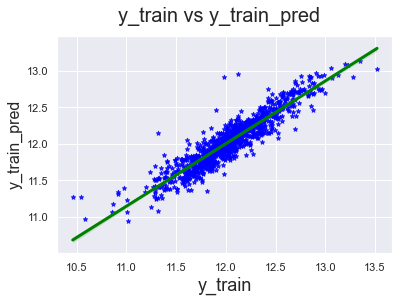

In [123]:
fig = plt.figure()
# sns.scatterplot(y_test,y_test_pred)
sns.regplot(x=y_train,y=y_pred_train, scatter_kws = {"color": 'blue',"s": 20}, line_kws = {"color": 'green', "lw": 3}, marker='*')
fig.suptitle('y_train vs y_train_pred', fontsize = 20)              
plt.xlabel('y_train', fontsize = 18)                          
plt.ylabel('y_train_pred', fontsize = 16)
plt.show()

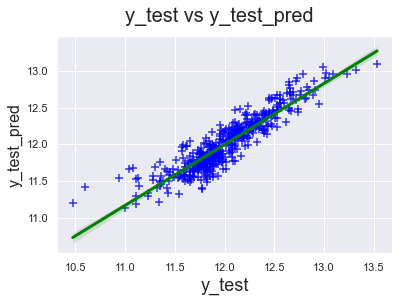

In [124]:
# Plotting graph b/w actual and predicted values with test data

fig = plt.figure()
# sns.scatterplot(y_test,y_test_pred)
sns.regplot(x=y_test,y=y_pred_test, scatter_kws = {"color": 'blue',"s": 50}, line_kws = {"color": 'green', "lw": 3}, marker='+')
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16)
plt.show()

## Residual analysis of train

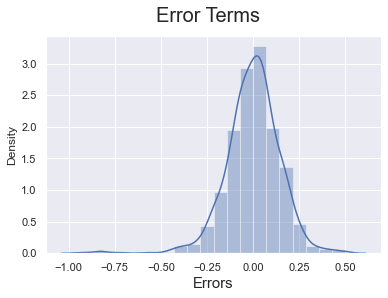

In [125]:
res = y_train - y_pred_train
fig = plt.figure()
sns.distplot(res,bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=15)
plt.show()

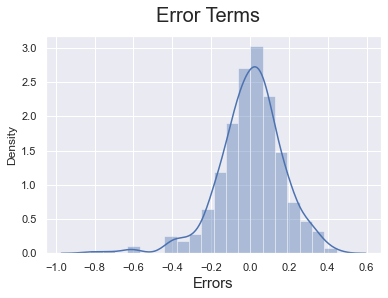

In [126]:
res = y_test - y_pred_test
fig = plt.figure()
sns.distplot(res,bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=15)
plt.show()

Linear Regression

- REsidual are around 0 
- train and test prediction are linear to actual values
- train r2 score is 0.8585553009127601
- test r2 score is 0.8345758562055663

Linear Regression feature and coefficents

In [127]:
df_linear = pd.DataFrame(index=X_train_rfe.columns)
df_linear.rows = X_train_rfe.columns
df_linear['Linear'] = lm.params
df_linear

,Linear
MSSubClass,-0.158513
LotArea,0.584710
OverallQual,0.968906
OverallCond,0.130120
BsmtFullBath,0.279820
FullBath,0.236949
TotRmsAbvGrd,0.401223
Fireplaces,0.211342
GarageCars,0.418052
EnclosedPorch,-0.049253


In [128]:
 
names = X_train_rfe.columns
print(len(names))
print(list(names))

33
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'EnclosedPorch', 'Age_RemodAdd_Years', 'MSZoning_RH', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_FR3', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'BldgType_Twnhs', 'HouseStyle_2.5Unf', 'Exterior1st_BrkComm', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_Wd Sdng', 'BsmtQual_Fa', 'HeatingQC_Po', 'Functional_Maj2', 'Functional_Sev', 'SaleType_ConLD']


## LASSO Reg

In [129]:
X_train = X_train[names]
X_test = X_test[names]

In [130]:
print(X_train.shape)
print(X_test.shape)

(1022, 33)
(438, 33)


In [131]:
params = { 'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}

In [132]:
lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [133]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008776,0.001164,0.004389,0.001353,0.0001,{'alpha': 0.0001},-0.117602,-0.122341,-0.116024,-0.112310,-0.098262,-0.113308,0.008183,1,-0.108093,-0.105640,-0.106895,-0.109100,-0.112064,-0.108359,0.002186
1,0.006184,0.001163,0.003391,0.000798,0.001,{'alpha': 0.001},-0.117711,-0.125220,-0.120657,-0.119681,-0.100629,-0.116779,0.008443,2,-0.112383,-0.109925,-0.112167,-0.114326,-0.116836,-0.113127,0.002320
2,0.005985,0.000893,0.003790,0.000399,0.01,{'alpha': 0.01},-0.142894,-0.153486,-0.165366,-0.152654,-0.131653,-0.149211,0.011308,3,-0.150619,-0.142650,-0.147402,-0.146830,-0.152214,-0.147943,0.003315
3,0.005784,0.000746,0.003989,0.000631,0.05,{'alpha': 0.05},-0.272997,-0.271448,-0.304363,-0.264130,-0.244838,-0.271555,0.019222,4,-0.270532,-0.272349,-0.265765,-0.271593,-0.275803,-0.271208,0.003245
4,0.005386,0.001017,0.003789,0.001163,0.1,{'alpha': 0.1},-0.307211,-0.307017,-0.337920,-0.298885,-0.282081,-0.306623,0.018123,5,-0.305782,-0.306035,-0.298945,-0.308219,-0.312146,-0.306225,0.004296


In [134]:
cv_results.shape

(28, 21)

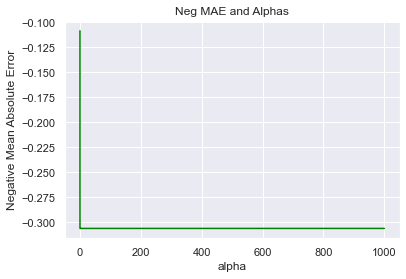

In [135]:
# Plotting train scores with alpha

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], color='green')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

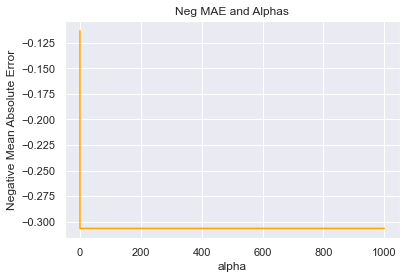

In [136]:
# Plotting testing scores with alpha
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], color='orange')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

### optimal value of lambda

In [137]:
optimalvalue_lasso = model_cv.best_params_['alpha']
optimalvalue_lasso

0.0001

### final Lasso Regression

In [138]:
alpha = optimalvalue_lasso
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [139]:
lasso.coef_

array([-0.15712565,  0.53661964,  0.96959095,  0.12726718,  0.2802782 ,
        0.23580974,  0.39925391,  0.21463996,  0.41966086, -0.04762281,
       -0.1566095 , -0.02600826, -0.18232213,  0.09998201,  0.14065215,
        0.06846739, -0.10984359,  0.13588524,  0.16810793,  0.11291462,
        0.18008183,  0.12538733, -0.0674346 , -0.02559013, -0.27323722,
       -0.11878654, -0.10436592,  0.08938224, -0.04772491, -0.16184252,
       -0.29406355, -0.19307108,  0.00235519])

In [140]:
df_lasso = pd.DataFrame(index=X_train.columns)
df_lasso.rows = X_train.columns
df_lasso['Lasso'] = lasso.coef_
df_lasso

,Lasso
MSSubClass,-0.157126
LotArea,0.536620
OverallQual,0.969591
OverallCond,0.127267
BsmtFullBath,0.280278
FullBath,0.235810
TotRmsAbvGrd,0.399254
Fireplaces,0.214640
GarageCars,0.419661
EnclosedPorch,-0.047623


#### Lasso Reg model eval

In [141]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_l = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_l.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_l.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_l.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_l.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_l.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_l.append(mse_test_lr**0.5)

Train r2 score is : 0.8582327514738652
Test r2 score is : 0.8354077454048996
Train RSS score is : 22.45816804345217
Test RSS score is : 12.230030813527366
Train MSE score is : 0.021974724112966897
Test MSE score is : 0.027922444779742844


### Ridge Regression

In [142]:
X_train = X_train[names]
X_test = X_test[names]

In [143]:
print(X_train.shape)
print(X_test.shape)

(1022, 33)
(438, 33)


In [144]:
params = { 'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}

In [145]:
ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [146]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011968,0.007596,0.004787,0.001163,0.0001,{'alpha': 0.0001},-0.117284,-0.122456,-0.115718,-0.111900,-0.098412,-0.113154,0.008112,1,-0.107750,-0.105311,-0.106688,-0.108872,-0.111889,-0.108102,0.002229
1,0.012368,0.003490,0.004986,0.000002,0.001,{'alpha': 0.001},-0.117286,-0.122452,-0.115719,-0.111902,-0.098412,-0.113154,0.008112,2,-0.107750,-0.105312,-0.106689,-0.108874,-0.111889,-0.108103,0.002229
2,0.010173,0.000747,0.005584,0.002239,0.01,{'alpha': 0.01},-0.117306,-0.122418,-0.115728,-0.111922,-0.098417,-0.113158,0.008104,3,-0.107756,-0.105323,-0.106697,-0.108886,-0.111895,-0.108111,0.002228
3,0.007580,0.001353,0.004388,0.000797,0.05,{'alpha': 0.05},-0.117394,-0.122272,-0.115768,-0.112005,-0.098437,-0.113175,0.008073,4,-0.107792,-0.105372,-0.106732,-0.108939,-0.111918,-0.108150,0.002222
4,0.008376,0.001351,0.005386,0.003315,0.1,{'alpha': 0.1},-0.117496,-0.122105,-0.115816,-0.112097,-0.098460,-0.113195,0.008038,5,-0.107851,-0.105432,-0.106775,-0.109006,-0.111948,-0.108202,0.002214


In [147]:
cv_results.shape

(28, 21)

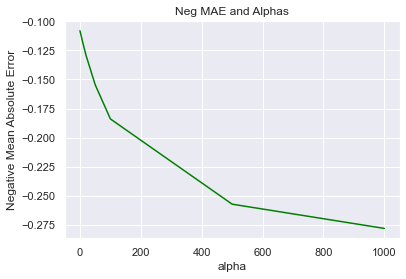

In [148]:
# train scrore of alha
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], color='green')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

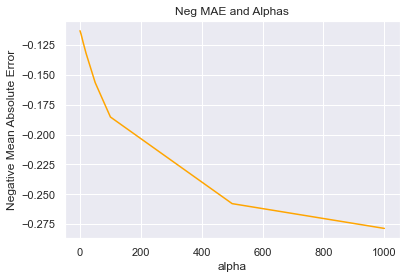

In [149]:
#  testing scores of alpha
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], color='orange')
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.show()

In [150]:
# optimal value of lambda
optimalvalue_ridge = model_cv.best_params_['alpha']
optimalvalue_ridge

0.0001

In [151]:
#final regression model
alpha = optimalvalue_ridge
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=0.0001)

In [152]:
ridge.coef_

array([-0.15851255,  0.58467952,  0.96889865,  0.13012067,  0.27982105,
        0.23695097,  0.4012226 ,  0.21134506,  0.41805322, -0.04925327,
       -0.1551095 , -0.03288414, -0.20050222,  0.10853222,  0.14818389,
        0.07694725, -0.14676626,  0.14044256,  0.17192722,  0.1174747 ,
        0.1860348 ,  0.13820731, -0.06969945, -0.03275933, -0.32529897,
       -0.12610974, -0.11214523,  0.09716403, -0.04806845, -0.26397017,
       -0.3193779 , -0.29726671,  0.0179726 ])

### Ridge feature and coefficient

In [153]:
df_ridge = pd.DataFrame(index=X_train.columns)
df_ridge.rows = X_train.columns
df_ridge['Ridge'] = ridge.coef_
df_ridge

,Ridge
MSSubClass,-0.158513
LotArea,0.584680
OverallQual,0.968899
OverallCond,0.130121
BsmtFullBath,0.279821
FullBath,0.236951
TotRmsAbvGrd,0.401223
Fireplaces,0.211345
GarageCars,0.418053
EnclosedPorch,-0.049253


ridge regression model evaluation

In [154]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_r = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_r.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_r.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_r.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_r.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_r.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_r.append(mse_test_lr**0.5)

Train r2 score is : 0.8585553008810435
Test r2 score is : 0.8345757647513119
Train RSS score is : 22.407071130279093
Test RSS score is : 12.29185115285419
Train MSE score is : 0.021924727133345492
Test MSE score is : 0.028063587106973036


In [155]:
# comparision of coefficient after regulaziation
comparison = pd.DataFrame(index=X_train.columns)
comparison.rows = X_train.columns

comparison['Linear'] = lm.params
comparison['Ridge'] = ridge.coef_
comparison['Lasso'] = lasso.coef_

In [156]:
comparison.sort_values(by='Lasso', ascending=False)

,Linear,Ridge,Lasso
OverallQual,0.968906,0.968899,0.969591
LotArea,0.584710,0.584680,0.536620
GarageCars,0.418052,0.418053,0.419661
TotRmsAbvGrd,0.401223,0.401223,0.399254
BsmtFullBath,0.279820,0.279821,0.280278
FullBath,0.236949,0.236951,0.235810
Fireplaces,0.211342,0.211345,0.214640
Neighborhood_StoneBr,0.186035,0.186035,0.180082
Neighborhood_NoRidge,0.171927,0.171927,0.168108
LandContour_Low,0.148183,0.148184,0.140652


In [157]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric_lr
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
rg_metric = pd.Series(metric_r, name = 'Ridge Regression')
ls_metric = pd.Series(metric_l, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.858555,0.858555,0.858233
1,R2 Score (Test),0.834576,0.834576,0.835408
2,RSS (Train),22.407071,22.407071,22.458168
3,RSS (Test),12.291844,12.291851,12.230031
4,MSE (Train),0.148070,0.148070,0.148239
5,MSE (Test),0.167522,0.167522,0.167100


Observations

- The R2 Score, RSS and MSE are all very close for Linear Regression, Ridge and Lasso
- Lasso has better scores by a very slight margin compared to Ridge and Linear Regression

# Problem Statement - Part II (Solving)

### Question 1

In [158]:
print(f"The optimal value for Ridge Regression is : {optimalvalue_ridge}")
print(f"The optimal value for Lasso Regression is : {optimalvalue_lasso}")

The optimal value for Ridge Regression is : 0.0001
The optimal value for Lasso Regression is : 0.0001


In [159]:
# Doubling Lasso and Ridge Regression's alpha values
optimalvalue_ridge *= 2
optimalvalue_lasso *= 2
print(f"Doubled alpha values of Ridge is {optimalvalue_ridge} and Lasso is {optimalvalue_lasso}")

Doubled alpha values of Ridge is 0.0002 and Lasso is 0.0002


In [160]:
#build lasso reg model
alpha = optimalvalue_lasso
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [161]:
lasso.coef_

array([-0.15633477,  0.48811243,  0.97014993,  0.1250987 ,  0.28088408,
        0.23490805,  0.39694368,  0.21810672,  0.42168836, -0.04637872,
       -0.15799394, -0.01885084, -0.16398109,  0.09170239,  0.13342634,
        0.06022326, -0.0729464 ,  0.13138252,  0.16438677,  0.10844597,
        0.174344  ,  0.11252927, -0.06466366, -0.01792939, -0.22097005,
       -0.11141307, -0.09649049,  0.0815642 , -0.04720874, -0.05954087,
       -0.26852417, -0.0887121 ,  0.        ])

In [162]:
df_lasso = pd.DataFrame(index=X_train.columns)
df_lasso.rows = X_train.columns
df_lasso['Lasso'] = lasso.coef_
df_lasso

,Lasso
MSSubClass,-0.156335
LotArea,0.488112
OverallQual,0.970150
OverallCond,0.125099
BsmtFullBath,0.280884
FullBath,0.234908
TotRmsAbvGrd,0.396944
Fireplaces,0.218107
GarageCars,0.421688
EnclosedPorch,-0.046379


lasso Reg model evaluation

In [163]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_double_l = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_double_l.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_double_l.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_double_l.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_double_l.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_double_l.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_double_l.append(mse_test_lr**0.5)

Train r2 score is : 0.8572929708103836
Test r2 score is : 0.8358173612997264
Train RSS score is : 22.607044122263616
Test RSS score is : 12.199594296160454
Train MSE score is : 0.02212039542295853
Test MSE score is : 0.027852955014064963


In [164]:
#build reg model
alpha = optimalvalue_ridge
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=0.0002)

In [165]:
ridge.coef_

array([-0.15851255,  0.58464893,  0.96889079,  0.1301215 ,  0.27982177,
        0.23695305,  0.40122269,  0.21134779,  0.41805427, -0.049254  ,
       -0.15511044, -0.03288445, -0.20049545,  0.10853221,  0.14818505,
        0.07694583, -0.14676097,  0.14044166,  0.1719275 ,  0.11747528,
        0.18603486,  0.13820608, -0.06969974, -0.03275924, -0.32528249,
       -0.12610797, -0.11214452,  0.09716239, -0.0480695 , -0.26394343,
       -0.31936961, -0.29723614,  0.01797254])

In [166]:
#ridge feature and coefficent
df_ridge = pd.DataFrame(index=X_train.columns)
df_ridge.rows = X_train.columns
df_ridge['Ridge'] = ridge.coef_
df_ridge

,Ridge
MSSubClass,-0.158513
LotArea,0.584649
OverallQual,0.968891
OverallCond,0.130122
BsmtFullBath,0.279822
FullBath,0.236953
TotRmsAbvGrd,0.401223
Fireplaces,0.211348
GarageCars,0.418054
EnclosedPorch,-0.049254


In [167]:
#Ridge Regression Model Evaluation
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_double_r = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"Train r2 score is : {r2_train_lr}")
metric_double_r.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"Test r2 score is : {r2_test_lr}")
metric_double_r.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"Train RSS score is : {rss1_lr}")
metric_double_r.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"Test RSS score is : {rss2_lr}")
metric_double_r.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"Train MSE score is : {mse_train_lr}")
metric_double_r.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE score is : {mse_test_lr}")
metric_double_r.append(mse_test_lr**0.5)

Train r2 score is : 0.8585553007859091
Test r2 score is : 0.8345756732852008
Train RSS score is : 22.407071145349875
Test RSS score is : 12.291857949245422
Train MSE score is : 0.021924727148091853
Test MSE score is : 0.028063602623847994


In [168]:
#Comparision
comparison['Ridge_Double'] = ridge.coef_
comparison['Lasso_Double'] = lasso.coef_

In [169]:
comparison.sort_values(by='Lasso', ascending=False)

,Linear,Ridge,Lasso,Ridge_Double,Lasso_Double
OverallQual,0.968906,0.968899,0.969591,0.968891,0.970150
LotArea,0.584710,0.584680,0.536620,0.584649,0.488112
GarageCars,0.418052,0.418053,0.419661,0.418054,0.421688
TotRmsAbvGrd,0.401223,0.401223,0.399254,0.401223,0.396944
BsmtFullBath,0.279820,0.279821,0.280278,0.279822,0.280884
FullBath,0.236949,0.236951,0.235810,0.236953,0.234908
Fireplaces,0.211342,0.211345,0.214640,0.211348,0.218107
Neighborhood_StoneBr,0.186035,0.186035,0.180082,0.186035,0.174344
Neighborhood_NoRidge,0.171927,0.171927,0.168108,0.171928,0.164387
LandContour_Low,0.148183,0.148184,0.140652,0.148185,0.133426


In [170]:
#Comparison of metrics after Regularization
rg_metric = pd.Series(metric_double_r, name = 'Double Ridge Regression')
ls_metric = pd.Series(metric_double_l, name = 'Double Lasso Regression')

final_metric = pd.concat([final_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression,Double Ridge Regression,Double Lasso Regression
0,R2 Score (Train),0.858555,0.858555,0.858233,0.858555,0.857293
1,R2 Score (Test),0.834576,0.834576,0.835408,0.834576,0.835817
2,RSS (Train),22.407071,22.407071,22.458168,22.407071,22.607044
3,RSS (Test),12.291844,12.291851,12.230031,12.291858,12.199594
4,MSE (Train),0.148070,0.148070,0.148239,0.148070,0.148729
5,MSE (Test),0.167522,0.167522,0.167100,0.167522,0.166892


### after double the values there is no significant changes in both metrics and feature .

### very minor variations but overall it is similar

## Question 3

In [171]:
comparison.sort_values(by='Lasso',ascending=False).head()

,Linear,Ridge,Lasso,Ridge_Double,Lasso_Double
OverallQual,0.968906,0.968899,0.969591,0.968891,0.970150
LotArea,0.584710,0.584680,0.536620,0.584649,0.488112
GarageCars,0.418052,0.418053,0.419661,0.418054,0.421688
TotRmsAbvGrd,0.401223,0.401223,0.399254,0.401223,0.396944
BsmtFullBath,0.279820,0.279821,0.280278,0.279822,0.280884


In [172]:
# Looking at the current top 5 important predictor variables in Lasso model
comparison.sort_values(by='Lasso',ascending=False).Lasso.head(5)

OverallQual     0.969591
LotArea         0.536620
GarageCars      0.419661
TotRmsAbvGrd    0.399254
BsmtFullBath    0.280278
Name: Lasso, dtype: float64

In [173]:
top5_names = list(comparison['Lasso'].sort_values(ascending=False).head(5).index)
top5_names

['OverallQual', 'LotArea', 'GarageCars', 'TotRmsAbvGrd', 'BsmtFullBath']

In [174]:
# Drop the top 5 important predictor variables from X_train and X_test
X_train = X_train.drop(top5_names, axis=1)
X_test = X_test.drop(top5_names, axis=1)

In [175]:
print(X_train.shape)
print(X_test.shape)

(1022, 28)
(438, 28)


In [176]:
params = { 'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}

In [177]:
# apply lasso reg
lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [178]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.023738,0.029622,0.004985,0.002524,0.0001,{'alpha': 0.0001},-0.180313,-0.169531,-0.179256,-0.156752,-0.163796,-0.169930,0.009013,2,-0.159635,-0.161032,-0.158635,-0.165182,-0.164349,-0.161766,0.002578
1,0.006382,0.000488,0.004788,0.001163,0.001,{'alpha': 0.001},-0.177962,-0.170781,-0.178803,-0.158255,-0.160742,-0.169309,0.008518,1,-0.161871,-0.162630,-0.161247,-0.167383,-0.166890,-0.164004,0.002599
2,0.005585,0.001017,0.003191,0.001163,0.01,{'alpha': 0.01},-0.193532,-0.191707,-0.210214,-0.195154,-0.179728,-0.194067,0.009730,3,-0.191266,-0.192966,-0.188832,-0.193400,-0.193207,-0.191934,0.001727
3,0.005784,0.000977,0.003790,0.000399,0.05,{'alpha': 0.05},-0.272997,-0.271448,-0.304363,-0.264130,-0.244838,-0.271555,0.019222,4,-0.270532,-0.272349,-0.265765,-0.271593,-0.275803,-0.271208,0.003245
4,0.004787,0.001323,0.003191,0.000746,0.1,{'alpha': 0.1},-0.307211,-0.307017,-0.337920,-0.298885,-0.282081,-0.306623,0.018123,5,-0.305782,-0.306035,-0.298945,-0.308219,-0.312146,-0.306225,0.004296


In [179]:
cv_results.shape

(28, 21)

In [180]:
optimalvalue_lasso = model_cv.best_params_['alpha']
optimalvalue_lasso

0.001

In [181]:
alpha = optimalvalue_lasso
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [182]:
df_lasso.sort_values(by='Lasso', ascending=False).head(5)

,Lasso
OverallQual,0.970150
LotArea,0.488112
GarageCars,0.421688
TotRmsAbvGrd,0.396944
BsmtFullBath,0.280884


# Thank you